# Mapeos en 2d

En lo que llevamos del curso hemos visto que, para entender la dinámica de un mapeo (en una dimensión) debemos conocer:
- los puntos fijos del mapeo;
- las órbitas periódicas;
- y, sus propiedades de estabilidad.

Además, enteder las propiedades de estabilidad en términos de los parámetros permite entender las bifurcaciones y, por tanto, aspectos globales de la dinámica.

En este notebook ampliaremos este tipo de cuestiones a mapeos dos-dimensionales, lo que se puede generalizar de manera muy directa a más dimensiones.

Al igual que para el caso de una dimensión, iniciaremos con el caso más sencillo que son los mapeos lineales:
\begin{eqnarray}
x_{n+1} & = & ax_{n} + by_{n},\\
y_{n+1} & = & cx_{n} + dy_{n}.
\end{eqnarray}

Obviamente, este mapeo lo podemos reescribir como $\mathbf{x}_{n+1}=\mathcal{A} \mathbf{x}_{n}$, donde $\mathbf{x}_i = [x_i,y_i]^\mathrm{T}$, y $\mathcal{A}$ es la matriz de coeficientes constantes
\begin{equation}
\mathcal{A} = \left( 
\begin{array}{cc}
a & b \\
c & d 
\end{array} 
\right).
\end{equation}

El punto de equilibrio en este caso es el origen.

En este caso, al igual que en el caso lineal para mapeos en una dimensión,
podemos resolver explícitamente la ecuación en diferencias, obteniendo
\begin{equation}
\mathbf{x}_{n} = \mathcal{A}^n \mathbf{x}_0.
\end{equation}


Dos mapeos lineales $L_1$ y $L_2$ se dicen conjugados, si existe un *mapeo invertible lineal* tal que $L_2=P^{-1} \circ L_1 \circ P$. Este concepto, expresado en términos de matrices, corresponde a que las matrices asociadas sean *similares*.

Uno puede demostrar que si dos mapeos $L_1$ y $L_2$ son conjugados, entonces sus eigenvalores (las raices del polinomio característico, 
$\det(L_i-\lambda \mathcal{I})=0$) son idénticos. 

Entonces, el estudio de los mapeos lineales se puede entender mejor en términos de los eigenvalores del mapeo, dado que la dinámica estará dada por
\begin{eqnarray}
x_n & = & \sum_i a_i^n (\mathbf{v}_i|x_0),\\
y_n & = & \sum_i a_i^n (\mathbf{v}_i|y_0),
\end{eqnarray}
donde $a_i$ y $\mathbf{v}_i$ son respectivamente el $i$-ésimo valor 
y vector propio (eigenvalor y eigenvector) de $\mathcal{A}$, y donde $(\mathbf{v}_i|x_0)$ es la primer componente del eigenvector $\mathbf{v}_i$ (proyección en la dirección $[1,0]^\mathrm{T}$) multiplicada por $x_0$. Aquí hemos asumido que los eigenvalores son distintos entre sí.

Para matrices de $2\times 2$, uno puede obtener explícitamente los eigenvalores, dado que el polinomio característico está dado por

\begin{equation}
\det(\mathcal{A}-\lambda\mathcal{I}) = \lambda^2 - \lambda(a+d) + ad-bc
= \lambda^2 - \lambda\mathrm{tr}(\mathcal{A}) + \det(\mathcal{A}) = 0,
\end{equation}

donde $\mathrm{tr}(\mathcal{A})=a+d$ es la traza de $\mathcal{A}$ y $\det(\mathcal{A})=ad-bc$ es su determinante.

Entonces, tenemos:

\begin{equation}
\lambda_\pm = \frac{1}{2}
\left( \mathrm{tr}(\mathcal{A}) \pm \sqrt{\mathrm{tr}(\mathcal{A})^2-4\det(\mathcal{A})}\right).
\end{equation}

In [49]:
using Plots
pyplot()

Plots.PyPlotBackend()

**Ejercicio 1:**

Hay tres formas *estándar* (bloques de Jordan) para matrices de $2\times2$, y que expresan los posibles valores que pueden tomar los eigenvalores. Estas formas son:
\begin{equation*}
\left( 
\begin{array}{cc}
\alpha & -\beta \\
\beta & \alpha 
\end{array} 
\right), 
\left( 
\begin{array}{cc}
\lambda & 1 \\
0 & \lambda 
\end{array} 
\right),
\left( 
\begin{array}{cc}
\lambda & 0 \\
0 & \mu
\end{array} 
\right),
\end{equation*}
donde $\alpha, \beta, \lambda$ y $\mu$ son reales, con $\beta\ne 0$ y $\mu\ne\lambda$. En esta forma, los elementos de la diagonal son los eigenvalores, excepto para la primer matriz, cuyos eigenvalores son $\alpha\pm i \beta$. 

En términos de éstos bloques caracterizen la dinámica (dibujen el comportamiento dinámico en el espacio fase) cerca de del origen (punto fijo). 

**Nota:** Pueden usar matrices concretas con dichas formas para investigar numéricamente la dinámica. Sean conscientes que los eigenvalor puedes tener distintos valores (signos, o ser cero), y deben describir *todos* los casos posibles.

In [41]:
function iterador(A, x0, n)
    
    x_orbit = zeros(length(x0), n)
    x_orbit[:, 1] = x0
    
    for i in 2:n
        
        x_orbit[:, i] = A*x_orbit[:, i-1]
        
    end
    
    x_orbit
    
end 

iterador (generic function with 1 method)

In [166]:
α = 0
β = 0.1 #not = 0
λ = 0.5
μ = 0 #not = λ

0

In [167]:
A = [α -β ; β α]

2x2 Array{Float64,2}:
 0.0  -0.1
 0.1   0.0

In [168]:
B = [λ 1 ; 0 λ]

2x2 Array{Float64,2}:
 0.5  1.0
 0.0  0.5

In [123]:
A

2x2 Array{Int64,2}:
 0  -1
 1   0

In [171]:
X0 = [2, 1]

2-element Array{Int64,1}:
 2
 1

In [176]:
X1 = [-3,-1]

2-element Array{Int64,1}:
 -3
 -1

In [172]:
x_orbita = iterador(B, X0, 10)

2x10 Array{Float64,2}:
 2.0  2.0  1.5   1.0    0.625   0.375    …  0.125      0.0703125   0.0390625 
 1.0  0.5  0.25  0.125  0.0625  0.03125     0.0078125  0.00390625  0.00195313

In [177]:
x1_orbita = iterador(B, X1, 10)

2x10 Array{Float64,2}:
 -3.0  -2.5  -1.75  -1.125  -0.6875  -0.40625  …  -0.0742188   -0.0410156 
 -1.0  -0.5  -0.25  -0.125  -0.0625  -0.03125     -0.00390625  -0.00195313


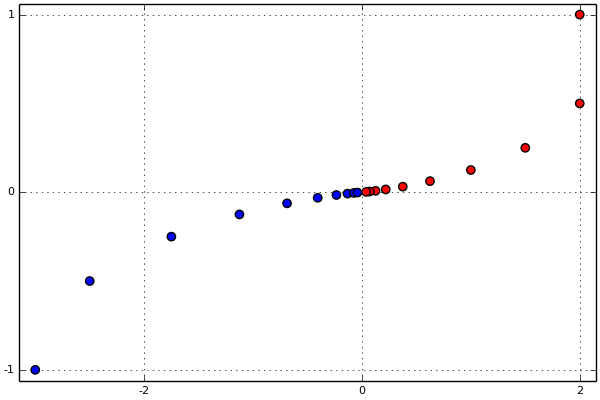

In [180]:
scatter(x_orbita[1,:], x_orbita[2,:], legend=false, color=:red)
scatter!(x1_orbita[1,:], x1_orbita[2,:], legend=false, color=:blue)

In [206]:
function condiones_iniciales_2D(f::Function, t_range)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[:, i] = f(t_range[i])
        
    end
    
    CI
    
end

condiones_iniciales_2D (generic function with 1 method)

In [187]:
f(t) = [cos(t), sin(t)]

f (generic function with 1 method)

In [208]:
CI1 = condiones_iniciales_2D(f, t_rango)

2x20 Array{Float64,2}:
 1.0  0.951057  0.809017  0.587785  …   0.587785   0.809017   0.951057
 0.0  0.309017  0.587785  0.809017     -0.809017  -0.587785  -0.309017


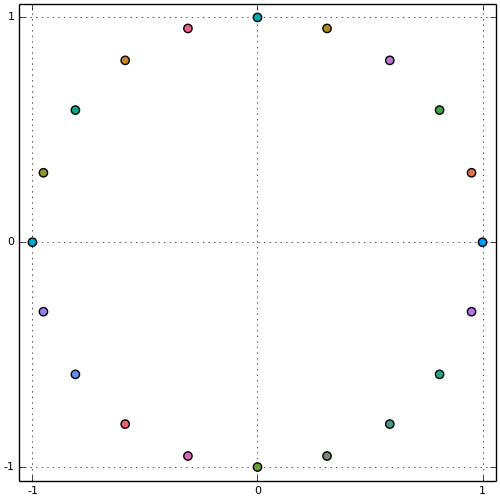

In [211]:
scatter(CI1[1,:], CI1[2, :], legend=false, size=(500, 500))

In [212]:
B

2x2 Array{Float64,2}:
 0.5  1.0
 0.0  0.5

In [ ]:
shuster deterministic chaos

In [218]:
n = 10
solutions = zeros(2, length(CI1[1,:]), n)

for c in 1:length(CI1[1,:])
    
    
    
end

2x20 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [194]:
t_rango = 0:π/10:2π-π/10

0.0:0.3141592653589793:5.969026041820607

In [188]:
a[:, ] = f(0)

2-element Array{Float64,1}:
 1.0
 0.0

**Ejercicio 2:**

En términos de la dependencia de los eigenvalores de la traza y del determinante de la matriz (ecuación (8)), uno puede definir el plano donde el eje horizontal corresponde al determinante, y el vertical a la traza.(El discriminante, $\mathrm{tr}(\mathcal{A})^2-4\det(\mathcal{A})$ en este plano es una parábola.) Clasifiquen la dinámica cerca del origen en este plano.

In [86]:
B = [2 0 ; 0 1]

2x2 Array{Int64,2}:
 2  0
 0  1

In [89]:
x_orbita = iterador(B, X0, 10)

2x10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

**Ejercicio 3:**

Consideren el mapeo:

\begin{equation*}
\mathbf{x}_{n+1} = \left( 
\begin{array}{cc}
2 & 1 \\
1 & 1
\end{array} 
\right) \mathbf{x}_n, \mod 1.
\end{equation*}

- Muestren que el mapeo es hiperbólico, es decir, los eigenvalores de la linearización del mapeo son todos distintos de 1 en valor absoluto. (En general, se pide que los eigenvalores de la matriz linearizada no estén en el círculo unitario para que el sistema sea hiperbólico.) Este es un ejemplo de los mapeos que se llaman torales hiperbólicos.

- Construyan el mapeo inverso.

- ¿Qué podemos decir de la dinámica de $\mathbf{x}_0$ cuando *ambas* entradas son racionales? Como ambas entradas son racionales, $\mathbf{x}_0$ puede ser escrito como 
\begin{equation*}
\mathbf{x}_0 
= \left[ 
\begin{array}{c}
p_1/q_1 \\
p_2/q_2
\end{array} 
\right ]
= \left[ 
\begin{array}{c}
r/k \\
s/k
\end{array}
\right ],
\end{equation*}
donde $p_i, q_i, r, s, k$ son enteros; $k$ es un denominador común.

- A partir de los eigenvalores y eigenvectores, dibujen el conjunto de puntos que, iterados hacia el pasado terminan en el origen (variedad inestable) y que iterados hacia el futuro terminan también ahí (variedad estable). ¿Usen los eigenvectores como una aproximación lineal **muy** cerca del punto fijo e iteren. 

- ¿Se cruzan (con un ángulo distinto de 0 o $\pi$) estas variedades? En otras palabras, existen *intersecciones homoclínicas* en el mapeo?

- ¿Qué podemos decir sobre la densidad de órbitas periódicas para este mapeo? ¿Qué podemos decir sobre la densidad de puntos homoclínicos?

**Ejercicio 4:**

Consideren el mapeo lineal por segmentos
\begin{equation*}
\left[ 
\begin{array}{c}
x_{n+1} \\
y_{n+1}
\end{array} 
\right ] = L \left[ 
\begin{array}{c}
x_{n} \\
y_{n}
\end{array} 
\right ] = \left[ 
\begin{array}{c}
1+y_n+A|x_n| \\
B x_{n}
\end{array} 
\right ], 
\end{equation*}

donde $A$ y $B$ son parámetros numéricos que satisfacen: $1>B>0, A>B+1$ y  $2A+B<4$.

- Obtengan los dos puntos fijos del mapeo, y la estabilidad lineal de cada uno de ellos. 

- Denotando como $p$ al punto fijo que se encuentra en el primer cuadrante del plano, muestren que la variedad inestable de este punto contiene una recta que intersecta al eje x en el punto $q$ y al eje y en el punto $L^{-1}(q)$.

- Consideren la región triangular definida por los vértices $q$, $L(q)$ y $L^2(q)$. ¿Cómo se ven las órbitas de condiciones iniciales definidas en esta región?

**Ejercicio 5:**

Consideren el mapeo $Q_\lambda$ del plano, definido por
\begin{eqnarray*}
x_{n+1} & = & \exp(x_n) - \lambda,\\
y_{n+1} & = & -\frac{\lambda}{2}\arctan{y_n},\\
\end{eqnarray*}
donde $\lambda$ es un parámetro. 

- Encuentren todos los puntos fijos y las órbitas de periodo 2.

- Clasifiquen esos puntos como puntos sumideros (*sinks*), fuentes (*sources*), o sillas (*saddles*), según los eigenvalores del mapeo linearizado.

- Este mapeo lo podemos ver como el producto cartesiano de dos mapeos en una dimensión. Considerándolo así, ¿qué bifurcaciones ocurren que involucran a los puntos fijos y de periodo 2?

- ¿Qué podemos concluir de los puntos de bifurcación, en términos de los eigenvalores?